# CSS324 Homework Assignment

CIFAR10 is a small image classification dataset. Its objective is to classification an 32x32 color image into 10 classes.

See https://www.cs.toronto.edu/~kriz/cifar.html and https://keras.io/api/datasets/cifar10/ for more details.

In [26]:
# By Narathee Bunpanya 6222780767 & Saritpong Hengsamrithiphol 6222781666
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# Load CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

7


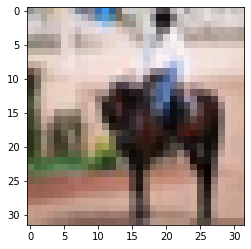

In [28]:
# Plot a training example
x = x_train[11, :, :, :]
y = y_train[11][0]

plt.imshow(x)
print(y)        # 7 = horse

In [5]:
x.shape

(32, 32, 3)

In [6]:
y_train[1]

array([9], dtype=uint8)

## Question 1

Construct a deep neural network containing three hidden layer to classify images in the CIFAR10 dataset. You can choose the numbers of hidden nodes in three layers, appropriate activation functions, regularizers. Use 20% of the training set to validate the model.

After the training process, print the training, validation, and test accuracies, as well as plot the training loss and validation loss.

In [7]:
# Preprocess

# Normalize input vectors
# [0, 255] --> [0.0, 1.0]
x_train = x_train / 255.0
x_test = x_test / 255.0

# # Encode target outputs using one-hot encoding

# y_train = tf.one_hot(y_train, 10)
# y_test = tf.one_hot(y_test, 10)

In [8]:
print(x_train.shape,y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [9]:
# Define a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32,3)),
   
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu',input_shape=(30,),
                          kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),			
    tf.keras.layers.Dense(64, activation='relu',input_shape=(30,),
                          kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),		
    tf.keras.layers.Dense(10, activation='sigmoid',input_shape=(30,))
    
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Display the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 batch_normalization (BatchN  (None, 3072)             12288     
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [10]:
# Train the model
history = model.fit(x_train, y_train, epochs=200, batch_size=1024, shuffle=True, validation_split=0.2)


Epoch 1/200
40/40 [==============================] - 5s 29ms/step - loss: 2.2719 - accuracy: 0.2623 - val_loss: 2.0080 - val_accuracy: 0.2732
Epoch 2/200
40/40 [==============================] - 1s 18ms/step - loss: 1.9542 - accuracy: 0.3318 - val_loss: 1.8678 - val_accuracy: 0.3554
Epoch 3/200
40/40 [==============================] - 1s 18ms/step - loss: 1.8478 - accuracy: 0.3623 - val_loss: 1.8047 - val_accuracy: 0.3907
Epoch 4/200
40/40 [==============================] - 1s 18ms/step - loss: 1.7712 - accuracy: 0.3836 - val_loss: 1.7766 - val_accuracy: 0.4009
Epoch 5/200
40/40 [==============================] - 1s 20ms/step - loss: 1.7234 - accuracy: 0.4018 - val_loss: 1.7291 - val_accuracy: 0.4079
Epoch 6/200
40/40 [==============================] - 1s 18ms/step - loss: 1.6856 - accuracy: 0.4129 - val_loss: 1.6642 - val_accuracy: 0.4322
Epoch 7/200
40/40 [==============================] - 1s 18ms/step - loss: 1.6519 - accuracy: 0.4244 - val_loss: 1.6206 - val_accuracy: 0.4428
Epoch 

{'loss': [2.271937608718872, 1.9542471170425415, 1.8478233814239502, 1.7711906433105469, 1.7234185934066772, 1.6856046915054321, 1.6519060134887695, 1.6298269033432007, 1.601001501083374, 1.583608627319336, 1.5658254623413086, 1.5460822582244873, 1.539094090461731, 1.528282880783081, 1.518883466720581, 1.5077221393585205, 1.4925193786621094, 1.4818177223205566, 1.474765658378601, 1.4635573625564575, 1.4519785642623901, 1.4499304294586182, 1.441504716873169, 1.4342422485351562, 1.432386875152588, 1.4236571788787842, 1.4176506996154785, 1.4065619707107544, 1.4086740016937256, 1.4031822681427002, 1.399652123451233, 1.3926371335983276, 1.3852014541625977, 1.3726447820663452, 1.3855684995651245, 1.3681837320327759, 1.373015284538269, 1.3637645244598389, 1.3570984601974487, 1.3585110902786255, 1.3631625175476074, 1.3546892404556274, 1.3503214120864868, 1.3512393236160278, 1.349475622177124, 1.341045618057251, 1.3460133075714111, 1.342368483543396, 1.33168363571167, 1.3324929475784302, 1.3253

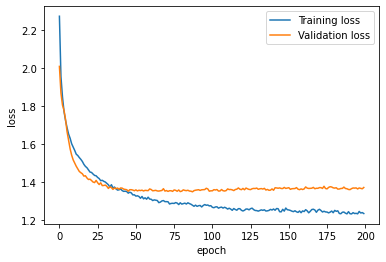

In [11]:
# Plot the training loss and validation loss
print(history.history)

# Evaluate the model
print(model.evaluate(x_train, y_train, verbose=0))
print(model.evaluate(x_test, y_test, verbose=0))

loss_train = np.array(history.history['loss'])
loss_test = np.array(history.history['val_loss'])

x = np.arange(0, loss_train.shape[0])
plt.plot(x, loss_train, label="Training loss")
plt.plot(x, loss_test, label="Validation loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Training loss', 'Validation loss'])
plt.show()

## Question 2

Construct a convolutional neural network using your own structure. Try to maximize the prediction accuracy of your model.

After the training process, print the training, validation, and test accuracies, as well as plot the training loss and validation loss.

In [29]:
# Your implementation for Question 2
#Preprocesses
x_train= x_train/255
x_test= x_test/255

In [30]:
#Reshape the model
x_train = x_train.reshape((-3, 32, 32, 3))
x_test = x_test.reshape((-3, 32, 32, 3))
tf.random.set_seed(11)

In [31]:
#Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (3,3)), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D((3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(128, (3,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D((3,3), strides=(2,2)),
    tf.keras.layers.SpatialDropout2D(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),			
    tf.keras.layers.Dense(10, activation='softmax')
  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Display the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization_9 (Batc  (None, 30, 30, 64)       256       
 hNormalization)                                                 
                                                                 
 re_lu_4 (ReLU)              (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 batch_normalization_10 (Bat  (None, 12, 12, 128)     

In [32]:
#Train the Model
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
 filepath='/tmp/checkpoint',
 save_weights_only=True,
 monitor = 'val_accuracy',
 mode='max',
 save_best_only=True)

history = model.fit(x_train, y_train, epochs = 200,
                     batch_size=512,shuffle=True,
                     validation_split=0.2,callbacks=[model_checkpoint_callback])
print(history.history)

Epoch 1/200
79/79 [==============================] - 6s 67ms/step - loss: 1.9092 - accuracy: 0.3843 - val_loss: 2.8837 - val_accuracy: 0.0952
Epoch 2/200
79/79 [==============================] - 5s 62ms/step - loss: 1.4701 - accuracy: 0.5039 - val_loss: 3.3147 - val_accuracy: 0.1028
Epoch 3/200
79/79 [==============================] - 5s 62ms/step - loss: 1.3311 - accuracy: 0.5533 - val_loss: 3.1167 - val_accuracy: 0.1059
Epoch 4/200
79/79 [==============================] - 5s 62ms/step - loss: 1.2397 - accuracy: 0.5850 - val_loss: 3.0360 - val_accuracy: 0.1237
Epoch 5/200
79/79 [==============================] - 5s 62ms/step - loss: 1.1812 - accuracy: 0.6077 - val_loss: 2.2792 - val_accuracy: 0.2960
Epoch 6/200
79/79 [==============================] - 5s 62ms/step - loss: 1.1365 - accuracy: 0.6225 - val_loss: 1.9413 - val_accuracy: 0.3623
Epoch 7/200
79/79 [==============================] - 5s 62ms/step - loss: 1.1047 - accuracy: 0.6371 - val_loss: 1.3595 - val_accuracy: 0.5336
Epoch 

[0.3604948818683624, 0.9487599730491638]
[0.814699649810791, 0.7836999893188477]


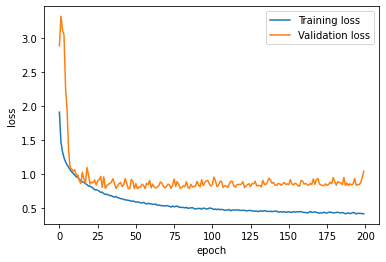

In [33]:
# Load the best weights
model.load_weights('/tmp/checkpoint')

print(model.evaluate(x_train, y_train, verbose=0))
print(model.evaluate(x_test, y_test, verbose=0))

# Plot the training loss and validation loss
loss_train = np.array(history.history['loss'])
loss_test = np.array(history.history['val_loss'])

x = np.arange(0, loss_train.shape[0])
plt.plot(x, loss_train, label="Training loss")
plt.plot(x, loss_test, label="Validation loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Training loss', 'Validation loss'])
plt.show()